# Introduction to Machine Learning with Python

### at MSU Data Science 2018

In [59]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,scipy,matplotlib,sklearn,pandas,mlxtend

ModuleNotFoundError: No module named 'watermark'

### Links

- GitHub repository: https://github.com/rasbt/msu-datascience-ml-tutorial-2018
- Slides: https://speakerdeck.com/rasbt/machine-learning-with-python         

# Table of Contents

* [1 Introduction to Machine Learning](#1-Introduction-to-Machine-Learning)
* [2 Linear Regression](#2-Linear-Regression)
    * [Loading the dataset](#Loading-the-dataset)
    * [Preparing the dataset](#Preparing-the-dataset)
    * [Fitting the model](#Fitting-the-model)
    * [Evaluating the model](#Evaluating-the-model)
* [3 Introduction to Classification](#3-Introduction-to-Classification)
    * [The Iris dataset](#The-Iris-dataset)
    * [Class label encoding](#Class-label-encoding)
    * [Scikit-learn's in-build datasets](#Scikit-learn's-in-build-datasets)
    * [Test/train splits](#Test/train-splits)
    * [Logistic Regression](#Logistic-Regression)
    * [K-Nearest Neighbors](#K-Nearest-Neighbors)
    * [3 - Exercises](#3---Exercises)
* [4 - Feature Preprocessing & scikit-learn Pipelines](#4---Feature-Preprocessing-&-scikit-learn-Pipelines)
    * [Categorical features: nominal vs ordinal](#Categorical-features:-nominal-vs-ordinal)
    * [Normalization](#Normalization)
    * [Pipelines](#Pipelines)
    * [4 - Exercises](#4---Exercises)
* [5 - Dimensionality Reduction: Feature Selection & Extraction](#5---Dimensionality-Reduction:-Feature-Selection-&-Extraction)
    * [Recursive Feature Elimination](#Recursive-Feature-Elimination)
    * [Sequential Feature Selection](#Sequential-Feature-Selection)
    * [Principal Component Analysis](#Principal-Component-Analysis)
* [6 - Model Evaluation & Hyperparameter Tuning](#6---Model-Evaluation-&-Hyperparameter-Tuning)
    * [Wine Dataset](#Wine-Dataset)
    * [Stratified K-Fold](#Stratified-K-Fold)
    * [Grid Search](#Grid-Search)

Import general packages:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<div style='height:100px;'></div>

<div style='height:100px;'></div>

# 1 Introduction to Machine Learning

<div style='height:100px;'></div>

# 2 Linear Regression

### Loading the dataset

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
to the Size of the Head", Biometrika, Vol. 4, pp105-123


Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.


Variables/Columns
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)


Below is a screenshot showing the top rows of the dataset:

![](images/dataset_brain_screenshot.png)

We can now load the dataset conveniently using pandas' CSV (comma separated values) reader. Note that the columns in the data file are actually not comma-separated; thus, we use the `'\s+'` string, which is a regex shortcut specifying and arbitrary number of whitespaces as column separator. Typically, we use `sep=','` (the default) for comma-separated columns or `sep='\t'` for tab-separated columns. Further, the `comment='#'` argument specifies that the first few lines of the dataset (here, a description of the dataset) should be skipped. The `encoding='utf-8'` is typically not necessary, but based on my experience in the past, omitting it can cause issues for some Windows users.

Also, for more information on specific functions, you can always use the `?` operator in pandas (which is sometimes more convenient than looking for documentation online); e.g., copy and paste the following command into a new notebook cell and execute it to get more information: `pd.read_csv?`.

Now, let's get back to reading the `dataset_brain.txt` file:

In [2]:
df = pd.read_csv('dataset_brain.txt',
                 encoding='utf-8',
                 comment='#',
                 sep='\s+')
df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


Next, let's visualize the dataset using matplotlib.pyplot, which we imported as `plt` earlier. Here, we will only be looking at two variables, `'head-size'` and `'brain-weight'`:

Text(0, 0.5, 'Brain weight (grams)')

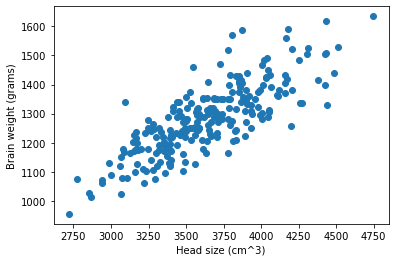

In [3]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)')

### Preparing the dataset

Assuming that `'brain-weight'` is the target variable (which we want to predict) and `'head-size'` is the feature we use for the prediction, let's prepare the dataset for scikit-learn. I.e., we assign the `'brain-weight'` to an array `y` and the feature to an array `X` (a common convention when using scikit-learn):

In [4]:
y = df['brain-weight'].values
y.shape

(237,)

In [5]:
X = df['head-size'].values
X.shape

(237,)

Note that scikit-learn expects 2D arrays as feature arrays; hence, we use `np.newaxis` to append another axis in this case:

In [6]:
X = X[:, np.newaxis]
X.shape

(237, 1)

Now that we have both the targets and the features in a "comfortable" format, let's split the dataset into two separate, non-overlapping sets, a training and a test set:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.3, random_state=123)

We used a fixed random seed to perform the split (here, `random_state=123`), which ensures that the data is always shuffled the same way prior to splitting -- this done is for reproducibility purposes. Note that you can choose any (positive) integer you like as a random seed.

Next, let's see how our splits look like:

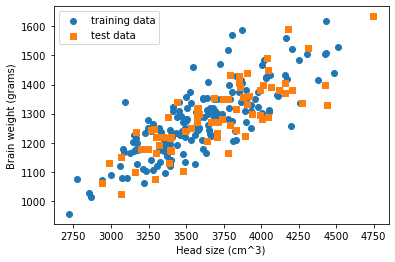

In [8]:
plt.scatter(X_train, y_train, marker='o', label='training data')
plt.scatter(X_test, y_test, marker='s', label='test data')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)')
plt.legend()
plt.show()

### Fitting the model

Now, on to the more exciting parts, fitting a linear regression model:

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Using the `fit` method, we train the model on the training dataset (the features and targets), so that the model "learns" the model coefficients of the linear regression model:

In [10]:
lr.coef_ # slope

array([0.271117])

In [11]:
lr.intercept_ # y-axis intercept

302.03033196088086

Then, to make predictions on new data (here: predicting the brain weight based on the head size), we use the `predict` method:

In [12]:
y_pred = lr.predict(X_test)
y_pred

array([1363.72450435, 1270.18913932, 1506.33204641, 1133.54617127,
       1341.76402734, 1471.90018739, 1270.46025632, 1347.45748435,
       1187.76957129, 1398.96971437, 1195.90308129, 1270.18913932,
       1160.11563728, 1353.42205835, 1361.28445135, 1403.57870337,
       1249.04201331, 1301.63871133, 1501.4519404 , 1219.2191433 ,
       1220.8458453 , 1331.19046434, 1589.02273144, 1112.39904526,
       1429.87705238, 1318.17684834, 1345.83078235, 1134.08840527,
       1182.07611429, 1385.14274736, 1194.54749629, 1459.69992239,
       1329.83487934, 1430.14816938, 1245.24637531, 1158.21781828,
       1273.98477732, 1434.48604138, 1326.58147534, 1098.84319525,
       1295.94525433, 1398.96971437, 1360.19998335, 1222.2014303 ,
       1369.41796135, 1221.9303133 , 1340.40844234, 1307.87440233,
       1316.00791233, 1201.59653829, 1235.48616331, 1441.80620038,
       1170.41808328, 1396.25854436, 1384.60051336, 1419.30348937,
       1347.99971835, 1259.07334231, 1272.62919232, 1389.75173

### Evaluating the model

A useful quantitative measure of a model's performance is the so-called Mean Squared Error (MSE), which is simply the average value of the SSE cost function that we minimize to fit the linear regression model. The MSE is useful to for comparing different regression models or for tuning their parameters via a grid search and cross-validation:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - \widehat{y}^{(i)}  \big)^2.$$

Sometimes it may be more useful to report the coefficient of determination ($R^2$), which can be understood as a standardized version of the MSE, for better interpretability of the model performance. In other words, $R^2$ is the fraction of response variance that is captured by the model. The $R^2$ value is defined as follows:

$$R^2 = 1 - \frac{SSE}{SST}$$

Here, SSE is the sum of squared errors and SST is the total sum of squares $SST = \sum^{n}_{i=1} \big( y^{(i)} - \mu_y \big)^2$, or in other words, it is simply the variance of the response. Let's quickly show that $R^2$ is indeed just the rescaled version of the MSE:

$$R^2 = 1 - \frac{SSE}{SST}$$

$$= 1 - \frac{\frac{1}{n} \sum^{n}_{i=1} \big( y^{(i)} - \hat{y}^{(i)}  \big)^2 }{\frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - \mu_y \big)^2 }$$
 
$$= 1 - \frac{MSE}{Var(y)}$$

For the training dataset, $R^2$ is bounded between 0 and 1, but it can become negative for the test set. If $R^2$ =1, the model  fits the data perfectly with a
corresponding $MSE = 0$.


Let's do this calculation "manually," first:

In [13]:
sum_of_squares = ((y_test - y_pred)**2).sum()
res_sum_of_squares = ((y_test - y_test.mean())**2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: %.3f' % r2_score)

R2 score: 0.635


Note that the $R^2$ can conveniently be computed via the regressor's `score` method:

In [14]:
print('R2 score: %.3f' % lr.score(X_test, y_test))

R2 score: 0.635


Next, let's visualize how the regression fit looks like:

In [15]:
lr.coef_

array([0.271117])

In [16]:
lr.intercept_

302.03033196088086

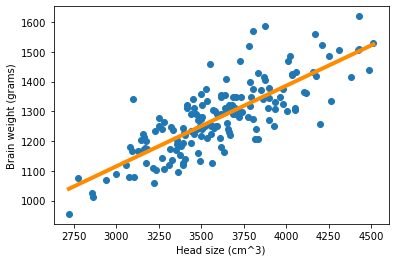

In [17]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='darkorange',
         linewidth=4)
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

Note that other performance metrics are available from sckit-learn's `metrics` module, http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics. For instance, we can do the following to compute the MSE:

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

5068.2151308071625

(Note that the MSE value looks very large; this is because we haven't normalized the data; we will talk about that later.)

<div style='height:100px;'></div>

# 3 Introduction to Classification

### The Iris dataset

Again, let's start by taking a quick look at the structure of the dataset, which is shown in the following screenshot:

![](images/dataset_iris_screenshot.png)

Here, the dataset is organized in 5 columns, which are separated by commas. The first four columns contain the features (several flower leaf dimensions in cm), and the last column contains the class labels. Using the convenient pandas `read_csv` function, we read the dataset into a DataFrame:

In [19]:
df = pd.read_csv('dataset_iris.txt',
                 encoding='utf-8',
                 comment='#',
                 sep=',')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Next, we assign the features to an NumPy array `X` and the class labels to a NumPy array `y`:

In [20]:
X = df.iloc[:, :4].values
y = df['class'].values

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 4)
y shape: (150,)


The unique class labels are as follows:

In [21]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Class label encoding

While most scikit-learn classifier objects can take care of the label encoding internally, it's usually recommended/common practice in machine learning to work with numeric (integer) labels for computationally efficiency/compatibility reasons.

So, this dataset offers a good opportunity for explaining how we can conveniently use some of scikit-learn's utilities to encode labels, starting with the `LabelEncoder`:

In [22]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Via the `fit` method, the encoder learned a mapping between string and integer class labels. For instance, the first element in the `classes_` array corresponds to label 0, the second entry corresponds to label 1, and so forth. Thus, the mapping in this case would be the following one:

- 'Iris-setosa' -> 0
- 'Iris-versicolor' -> 1
- 'Iris-virginica' -> 2

To transform the class labels stored in array y, we can call the `transform` method:

In [23]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2])

Conveniently, there's also a `inverse_transform` method that allows us to transform integer class labels back into their string representation:

In [24]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Scikit-learn's in-built datasets

For our convenience, scikit-learn comes with many different toy/benchmark datasets built-in, which are useful for learning and debugging purposes: http://scikit-learn.org/stable/datasets/index.html#toy-datasets.

For example, we can load the same iris dataset from scikit-learn as follows:

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Test/train splits

Anyways, after this little "label encoding digression" let's continue with the main objective, fitting a classifier. To fit a classifier, we need a training dataset (and an independent dataset for testing).

Here, we are only focusing on 2 features, sepal length and sepal width, for illustrative purposes.

In [26]:
X, y = iris.data[:, :2], iris.target
# ! We only use 2 features for visual purposes

print('Class labels:', np.unique(y))
print('Class proportions:', np.bincount(y))

Class labels: [0 1 2]
Class proportions: [50 50 50]


Next, we are going to split the dataset into 70% training data and 30% test data:

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

print('Class labels:', np.unique(y_train))
print('Class proportions (training set):', np.bincount(y_train))
print('Class proportions (test set):', np.bincount(y_test))

Class labels: [0 1 2]
Class proportions (training set): [32 40 33]
Class proportions (test set): [18 10 17]


Remember the discussion about class imbalance and stratification from the lecture? Especially if the dataset is small, random subsampling can skew the class label distributions a lot! Fortunately, it's easy to perform a stratified split by providing the class labels to the `stratify` parameter:

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y)

print('Class labels:', np.unique(y_train))
print('Class proportions (training set):', np.bincount(y_train))
print('Class proportions (test set):', np.bincount(y_test))

Class labels: [0 1 2]
Class proportions (training set): [35 35 35]
Class proportions (test set): [15 15 15]


### Logistic Regression

Next, we are going to fit a logistic regression model to predict whether an unseen flower is either a Iris setosa, versicolor, or virginica flower. Note that logistic regression is actually a binary classifier, meaning that it can only predict binary outcomes (0 or 1). There are multiple ways for applying logistic regression to multi-class problems. One of these is called OvR (one-vs-rest). 

in OvR, we fit 3 different logistic regression classifiers:
1. Setosa vs versicolor & virginica
2. Versicolor vs setosa & virginica
3. Virginica vs setosa & versicolor

Then, during prediction time, we let all of these classifiers make a prediction, and for the final prediction, we take the one classifier that outputs the highest probability for the *one* class it was trained on against the *rest*.

Another method is OvO (one-vs-one). Here, we train $K (K − 1) / 2$ binary logistic regression classifiers, where K is the number of classes (here: $3 (3-1)/2 = 3$). Then, to make a prediction, all of the binary classifiers are used, and the class with the highest number of votes gets selected.

The third strategy, and probably the most efficient and natural one when it comes to logistic regression, is the so-called multinomial regression model (or also known as softmax regression), which is a generalization of logistic regression for more than two classes. In a nutshell, the modification is depicted in the following figure:

![](images/softmax.png)


We won't go over the mathematical details due to timing constraints, but if you are interested, I have a write-up at http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/.

In any case, this was just the long way of explaining where the term "multinomial" in the following code example comes from:

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', 
                        multi_class='multinomial', 
                        random_state=1)

lr.fit(X_train, y_train)
print('Test accuracy %.2f' % lr.score(X_test, y_test))

Test accuracy 0.80


The code snippet above should look familiar to you. One of the nice things about scikit-learn is that the API is not only convenient but also consistent. Hence, the procedure for fitting and evaluating a classifier is exactly is equivalent to the approach we've used earlier to fit the linear regression model.

Next, we are going to use a handy tool that I implemented in mlxtend to visualize the decision regions of classifiers in 2D:

In [30]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions

plot_decision_regions(X=X, y=y, clf=lr, X_highlight=X_test)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]')

ModuleNotFoundError: No module named 'mlxtend'

Note that both training and test data points are shown, where the test data points are circled.

### K-Nearest Neighbors

Next, we are going to use a K-nearest neighbor classifier, which is a "lazy" learner as discussed in the lecture slides:

In [31]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=4)

kn.fit(X_train, y_train)
print('Test accuracy %.2f' % kn.score(X_test, y_test))

Test accuracy 0.82


In [32]:
plot_decision_regions(X=X, y=y, clf=kn, X_highlight=X_test)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');

NameError: name 'plot_decision_regions' is not defined

### 3 - Exercises

- Which of the two models above would you prefer if you had to choose? Why?
- What would be possible ways to resolve ties in KNN when `n_neighbors` is an even number?
- Can you find the right spot in the scikit-learn documentation to read about how scikit-learn handles this?
- Train & evaluate the Logistic Regression and KNN algorithms on the 4-dimensional iris datasets. 
  - What performance do you observe? 
  - Why is it different vs. using only 2 dimensions? 
  - Would adding more dimensions help?

<div style='height:100px;'></div>

# 4 - Feature Preprocessing & scikit-learn Pipelines

### Categorical features: nominal vs ordinal

When we are working with categorical features, we need to be careful to encode them correctly. For instance if a feature is nominal (no order implied), we do not want to simply replace feature values by different integers as machine learning algorithms usually assume the following relationship: 0 < 1 < 2 < 3 ... etc. In the next sections, we will look over some approaches on how to accomplish that. But first, let's start with a simple toy data set:

In [33]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.0],
                   ['red', 'L', 13.5],
                   ['blue', 'XL', 15.3]])

df.columns = ['color', 'size', 'prize']
df

,color,size,prize
0,green,M,10.0
1,red,L,13.5
2,blue,XL,15.3


One out of many approaches includes using scikit-learn's `DictVectorizer`, which requires a Python dictionary as input:

In [34]:
data_as_dict = df.transpose().to_dict()
data_as_dict

{0: {'color': 'green', 'size': 'M', 'prize': 10.0},
 1: {'color': 'red', 'size': 'L', 'prize': 13.5},
 2: {'color': 'blue', 'size': 'XL', 'prize': 15.3}}

The usage of transformer classes in scikit-learn is similar to how we use classifiers or regressors. First, we call a `fit` method on the dataset, and then we invoke a `transform` method (instead of `predict`) to transform a dataset. Note that `.fit_transform(X)` is a shortcut for `.fit(X).transform(X)`.

In [35]:
from sklearn.feature_extraction import DictVectorizer

dvec = DictVectorizer(sparse=False)

X = dvec.fit_transform(data_as_dict.values())
X

array([[ 0. ,  1. ,  0. , 10. ,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. , 13.5,  1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. , 15.3,  0. ,  0. ,  1. ]])

As we can see, the `DictVectorizer` automatically converts string variables into a one-hot encoded format. However, if you are interested in just converting integers into a one-hot encoded format, also have a look at scikit-learn's `OneHotEncoder` class (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

However, in practice, we may want to encode ordinal variables in a different way as they have an internal order (the values needed to be decided by the researcher and varies from case to case). For instance, it's super easy to achieve such an encoding using our pandas DataFrame via the map function and a Python dictionary:

In [36]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}

df_new = df.copy()
df_new['size'] = df_new['size'].map(size_mapping)
df_new

,color,size,prize
0,green,1,10.0
1,red,2,13.5
2,blue,3,15.3


In [37]:
df_new.dtypes

color     object
size       int64
prize    float64
dtype: object

In [38]:
X = dvec.fit_transform(df_new.transpose().to_dict().values())
X

array([[ 0. ,  1. ,  0. , 10. ,  1. ],
       [ 0. ,  0. ,  1. , 13.5,  2. ],
       [ 1. ,  0. ,  0. , 15.3,  3. ]])

Note that NumPy arrays only have a single type, hence, the last column contains floats, not integers as in the DataFrame `df_new`.

### Normalization

Data normalization can be performed quite easily with scikit-learn as well, using the transformer interface:

In [39]:
df = pd.DataFrame([1., 2., 3., 4., 5., 6.], columns=['feature'])
df

,feature
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0


In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mmxsc = MinMaxScaler()
stdsc = StandardScaler()

X = df['feature'].values[:, np.newaxis]

df['minmax'] = mmxsc.fit_transform(X)
df['z-score'] = stdsc.fit_transform(X)

df

,feature,minmax,z-score
0,1.0,0.0,-1.46385
1,2.0,0.2,-0.87831
2,3.0,0.4,-0.29277
3,4.0,0.6,0.29277
4,5.0,0.8,0.87831
5,6.0,1.0,1.46385


In practice, it's usually recommended to normalize your input data. The only algorithms that is scale-invariant and comes to mind are tree-based algorithms (decision trees, random forests, etc.). 


Some examples of algorithms where feature scaling matters are:

- k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
- linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you'd emphasize variables on "larger measurement scales" more.


Another important point to highlight is that we want to retrieve the normalization parameters from the training set and apply these to the test set (**don't refit a transformer on the test set!**), otherwise, funny things might happen.


Let me give a hands-on example why this is important!

Let's imagine we have a simple training set consisting of 3 samples with 1 feature column (let's call the feature column length in cm"):

- sample1: 10 cm -> class 2
- sample2: 20 cm -> class 2
- sample3: 30 cm -> class 1

Given the data above, we compute the following parameters:

- mean: 20
- standard deviation: 8.2

If we use these parameters to standardize the same dataset, we get the following values:

- sample1: -1.21 -> class 2
- sample2: 0 -> class 2
- sample3: 1.21 -> class 1

Now, let's say our model has learned the following hypotheses: It classifies samples with a standardized length value < 0.6 as class 2 (class 1 otherwise). So far so good. Now, let’s imagine we have 3 new unlabeled data points that you want to classify.

- sample4: 5 cm -> class ?
- sample5: 6 cm -> class ?
- sample6: 7 cm -> class ?

If we look at the "unstandardized "length in cm" values in our training dataset, it is intuitive to say that all of these samples are likely belonging to class 2. However, if we standardize these by re-computing the *standard deviation* and and *mean* from the new data, we would get similar values as before (i.e., properties of a standard normal distribution) in the training set and our classifier would (probably incorrectly) assign the "class 2" label to the samples 4 and 5.

- sample5: -1.21 -> class 2
- sample6: 0 -> class 2
- sample7: 1.21 -> class 1

However, if we use the parameters from your "training set standardization, we will get the following standardized values

- sample5: -18.37
- sample6: -17.15 
- sample7: -15.92

Note that these values are more negative than the value of `sample1` in the original training set, which makes much more sense now!

### Pipelines

Scikit-learn's pipelines are a super convenient tools that allow us to group multiple, different preprocessing steps together. For instance, in this simple example, we will be creating a pipelines that bundles a `StandardScaler` with a `LogisticRegression` classifier.

Note that the a `Pipeline` has a API that is similar to the classifier's API. If we call `fit` using a training dataset, it will fit the `StandardScaler` within the pipeline, transform the training dataset (here: standardizing it), and provide it to the classifier's fit method. Then, upon calling `predict` on the pipeline (or `score`), the test data will automatically be transformed via the `StandardScaler` and passed on to the classifier.

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y)

lr = LogisticRegression(solver='newton-cg',
                        multi_class='multinomial',
                        random_state=1)

lr_pipe = make_pipeline(StandardScaler(), lr)

lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)

0.9555555555555556

While this is just a simple example, pipelines are a super important concept in scikit-learn, because it not only allows us to perform operations more conveniently by grouping them, but also enforces doing them the "right" way, i.e., using training set parameters (e.g., the mean and standard deviation from standardization) on the test set.

And in case we want to access the individual elements within the pipeline, we can do so via the `named_steps` dictionary:

In [42]:
lr_pipe.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(multi_class='multinomial', random_state=1,
                    solver='newton-cg')}

In [43]:
lr_pipe.named_steps['standardscaler'].transform(X[:5])

array([[-0.92257899,  1.04365194, -1.36204734, -1.33302226],
       [-1.17919036, -0.09310588, -1.36204734, -1.33302226],
       [-1.43580174,  0.36159725, -1.42034941, -1.33302226],
       [-1.56410743,  0.13424568, -1.30374528, -1.33302226],
       [-1.05088468,  1.2710035 , -1.36204734, -1.33302226]])

### 4 - Exercises

- Why is it important that we scale test and training sets separately?
- Fit a KNN classifier to the standardized Iris dataset. Do you notice difference in the predictive performance of the model compared to the non-standardized one? Why or why not?

<div style='height:100px;'></div>

# 5 - Dimensionality Reduction: Feature Selection & Extraction

In this section, we will introduce some basic feature selection and feature extraction techniques that can be used for dimensionality reduction. As always, we start by loading a dataset and splitting it into a training and a test set:

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Recursive Feature Elimination

Feature elimination fits an a regression model iteratively. It starts with the full feature subset (the 4 Iris features) and removes the feature with the smallest regression coefficient in each iteration.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(lr, step=1)

rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression())

When it's finished, we can access the number of features that resulted in the best model via the `n_features_` attribute. Also, if we want to know which features were selected, we can look at the array stored under the `ranking_` attribute:

In [46]:
print('Number of features:', rfe.n_features_)
print('Feature ranking', rfe.ranking_)

Number of features: 2
Feature ranking [3 2 1 1]


The lower the ranking number the better; ranking values of 1 correspond to the selected features. In this case, this would be the petal length and petal width of the iris flowers.

### Sequential Feature Selection

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features that is most relevant to the problem. The goal of feature selection is two-fold: We want to improve the computational efficiency and reduce the generalization error of the model by removing irrelevant features or noise. A wrapper approach such as sequential feature selection is especially useful if embedded feature selection -- for example, a regularization penalty like LASSO -- is not applicable.

In a nutshell, SFAs remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached.


How is this different from Recursive Feature Elimination (RFE) -- e.g., as implemented in `sklearn.feature_selection.RFECV`? `RFECV` is computationally less complex using the feature weight coefficients (e.g., linear models) or feature importance (tree-based algorithms) to eliminate features recursively, whereas SFSs eliminate (or add) features based on a user-defined classifier/regression performance metric.

(Please see http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/ for more info).

Note that sequential feature selection algorithms are currently not implemented in scikit-learn; however, we are in the process of porting my mlxtend implementation over to scikit-learn.



In the following code, we will let the SFS run over all 4 features to suggest a feature subset for each feature size via forward selection. Once it's completed, we can access the scores for each subset via the `subsets_` attribute:

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(lr, 
          k_features=4, 
          forward=True, 
          scoring='accuracy',
          cv=5)

sfs.fit(X_train, y_train)
sfs.subsets_

ModuleNotFoundError: No module named 'mlxtend'

Please note that both RFECV and SFS are performing cross-validation internally to estimate the performance during the selection. We haven't talked about cross-validation, yet, but will do so in section 5. So, for now, only the "avg_score" is of interest. In this case, the results indicate the using more features improves the performance. 

In addition, we can use a helper utility to visualize the results:

In [48]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()

ModuleNotFoundError: No module named 'mlxtend'

A good rule of thumb for selecting feature subsets is to select the smallest feature subsets that is within 1 standard error of the best performing one, which would be the feature subset with `'feature_idx': (2, 3)`, i.e., petal length and petal width.

### Principal Component Analysis

Principal component analysis is a technique that compresses data onto a smaller-dimensional subspace while retaining most of its variance or spread (aka information). We won't go into the mathematical details of PCA here,  but I have written a post about it if you are interested: https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

If we specify n_components=4 and run this algorithm on our 4-feature iris dataset, it actually wouldn't reduce the dimensionality. However, this is still a useful approach since we can look at the variance-explained ratios of the individual components, which give us a clue in terms of how many components we should keep.

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=4)

pca.fit(X_train, y_train)

PCA(n_components=4)

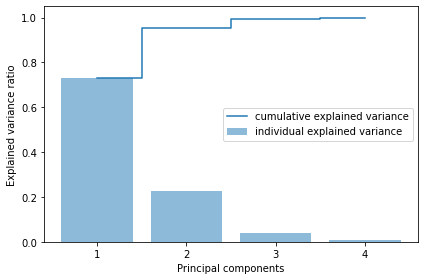

In [50]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

idx = [i for i in range(len(var_exp))]
labels = [str(i + 1) for i in idx]

plt.bar(range(4),
        var_exp,
        alpha=0.5,
        align='center',
        label='individual explained variance')

plt.step(range(4),
         cum_var_exp,
         where='mid', 
         label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(idx, labels)
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

The cumulative distribution plot above indicates that approx. 95% of the variance is explained by the first two components. Thus, a dimensionality reduction down to 2 dimensions would make sense in this case. In the following plot, the transformed iris data is visualized on the two new component axes. Note that PCA is a unsupervised technique and the class labels are only shown for illustrative purposes (or in other words, PCA does not use class labels).

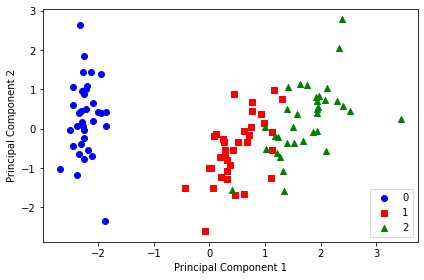

In [51]:
X_train_pca = pca.transform(X_train)

for lab, col, mar in zip((0, 1, 2),
                         ('blue', 'red', 'green'),
                         ('o', 's', '^')):
    plt.scatter(X_train_pca[y_train == lab, 0],
                X_train_pca[y_train == lab, 1],
                label=lab,
                marker=mar,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.tight_layout()

<div style='height:100px;'></div>

# 6 - Model Evaluation & Hyperparameter Tuning

### Wine Dataset

In [52]:
from mlxtend.data import wine_data

X, y = wine_data()

ModuleNotFoundError: No module named 'mlxtend'

Wine dataset.

Source : https://archive.ics.uci.edu/ml/datasets/Wine

Number of samples : 178

Class labels : {0, 1, 2}, distribution: [59, 71, 48]

Dataset Attributes:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline


### Stratified K-Fold

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier as KNN

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y)

pipe_kn = make_pipeline(StandardScaler(), 
                        PCA(n_components=1),
                        KNN(n_neighbors=3))

kfold = StratifiedKFold(y=y_train, 
                        n_folds=10,
                        random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_kn.fit(X_train[train], y_train[train])
    score = pipe_kn.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

TypeError: __init__() got an unexpected keyword argument 'y'

In [54]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_kn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=2)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

### Grid Search

In [55]:
pipe_kn.named_steps

{'standardscaler': StandardScaler(),
 'pca': PCA(n_components=1),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=3)}

In [56]:
from sklearn.model_selection import GridSearchCV


param_grid = {'pca__n_components': [1, 2, 3, 4, 5, 6, None],
              'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9, 11]}

gs = GridSearchCV(estimator=pipe_kn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=2,
                  refit=True)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9727272727272727
{'kneighborsclassifier__n_neighbors': 7, 'pca__n_components': 3}


/home/dsvb/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dsvb/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dsvb/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/dsvb/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  Fi

In [58]:
gs.score(X_test, y_test)

0.9555555555555556